<a href="https://colab.research.google.com/github/plthiyagu/Personnel/blob/master/Bank_Customer's_Churn_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
filename='https://raw.githubusercontent.com/plthiyagu/Personnel/master/Dataset/Churn_Modelling.csv'
df=pd.read_csv(filename)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
df.shape

(10000, 14)

In [12]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


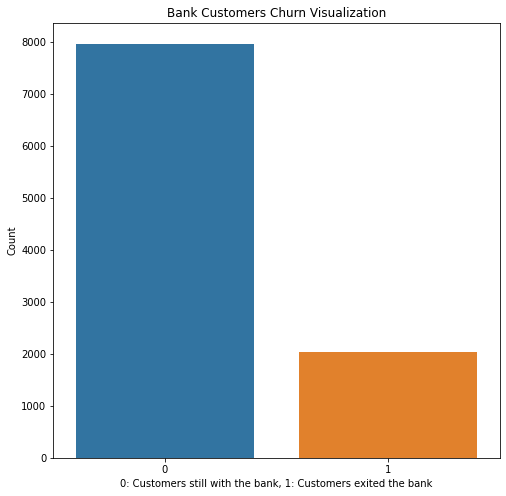

In [13]:
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [14]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [16]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [0]:
categorical_features = ["Geography","Gender","NumOfProducts","HasCrCard","IsActiveMember"]
numerical_features = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]
target = "Exited"


In [18]:
df[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd5541c8c50>,
      dtype=object)

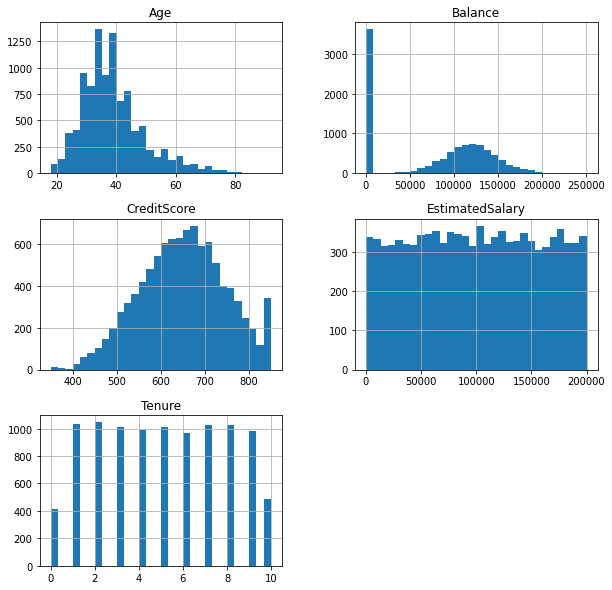

In [19]:
df[numerical_features].hist(bins=30, figsize=(10, 10))

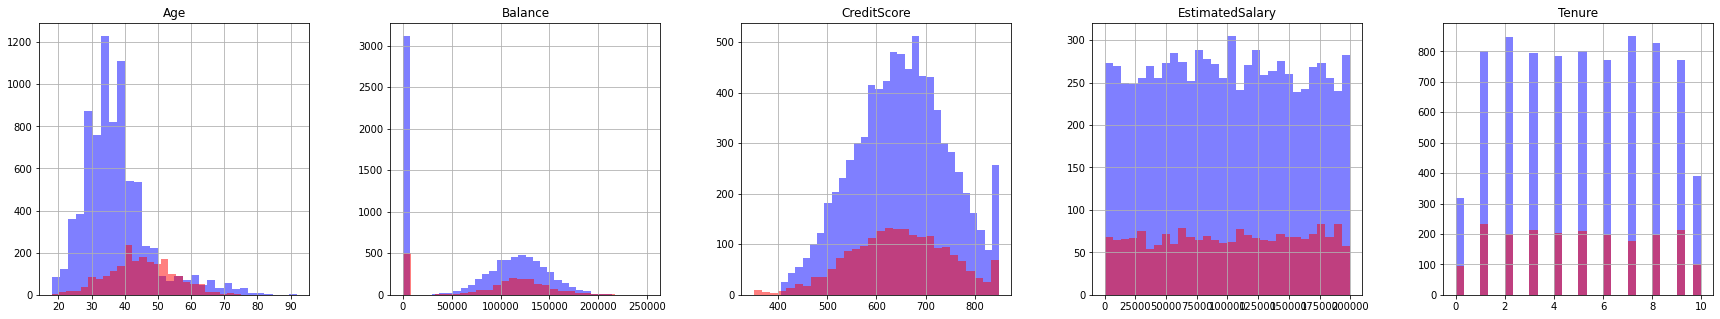

In [20]:
fig, ax = plt.subplots(1, 5, figsize=(30, 5))
df[df.Exited == 0][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited == 1][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax);

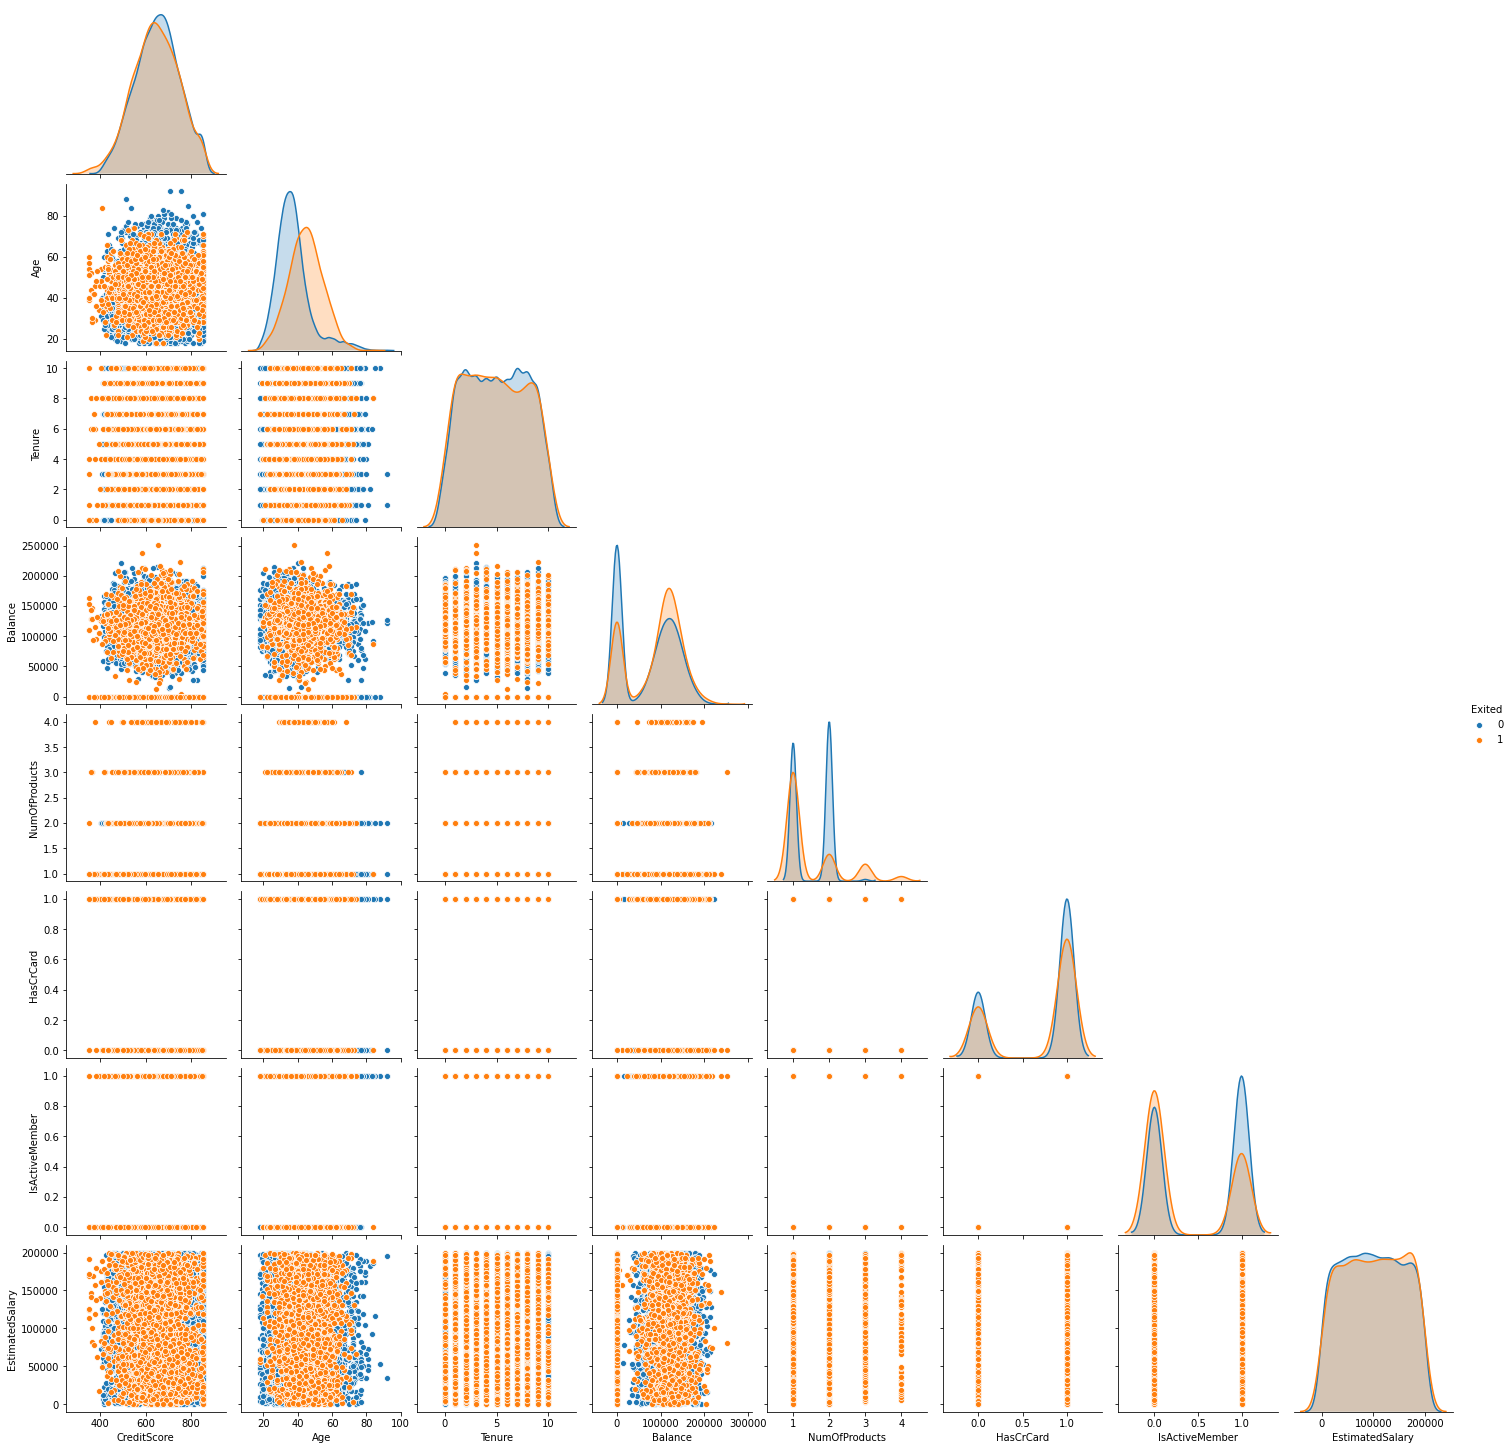

In [21]:
g = sns.pairplot(df,hue = 'Exited',corner=True)

In [0]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df["Geography"] = label_encoder.fit_transform(df["Geography"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])


In [23]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [24]:
df[numerical_features].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,199992.480000


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df[numerical_features])

In [0]:
df[numerical_features] = data_scaled

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,2,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,2,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [29]:
df = df
X = df.drop(['Exited'], axis=1)
y = df["Exited"]

NameError: ignored

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 10), X_test size: (2000, 10)


In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [34]:
!pip install catboost

     |████████████████████████████████| 64.8MB 61kB/s 


In [0]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
import time
from contextlib import contextmanager

In [38]:
#trying light gbm

lgb_train = lgb.Dataset(data=X_train, label=y_train,  free_raw_data=False)
lgb_eval = lgb.Dataset(data=X_test, label=y_test, reference=lgb_train,  free_raw_data=False)

params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'auc',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': -1
}
kategorik_indeks = [1,2,6,7,8]
print('Category Columns: ' + str(df.columns[kategorik_indeks].values))

print('Model...')
# Model evaluvation
evals_result={}
gbm = lgb.train(params,
                lgb_train,
                valid_sets = lgb_eval,
                categorical_feature = kategorik_indeks,
                num_boost_round= 150,
                early_stopping_rounds= 25,
                evals_result=evals_result)
print('model  train...')

# Tahmin ve değerlendirme
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

print(' iteration: ', gbm.best_iteration)
print('roc_auc Score:', roc_auc_score(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, ( y_pred>= 0.5)*1))


Category Columns: ['Geography' 'Gender' 'NumOfProducts' 'HasCrCard' 'IsActiveMember']
Model...
[1]	valid_0's auc: 0.850906
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's auc: 0.854545
[3]	valid_0's auc: 0.852948
[4]	valid_0's auc: 0.855138
[5]	valid_0's auc: 0.860065
[6]	valid_0's auc: 0.860129
[7]	valid_0's auc: 0.862651
[8]	valid_0's auc: 0.862878
[9]	valid_0's auc: 0.864481
[10]	valid_0's auc: 0.865386
[11]	valid_0's auc: 0.865712
[12]	valid_0's auc: 0.866724
[13]	valid_0's auc: 0.867711
[14]	valid_0's auc: 0.867671
[15]	valid_0's auc: 0.868589
[16]	valid_0's auc: 0.869929
[17]	valid_0's auc: 0.869914
[18]	valid_0's auc: 0.870485
[19]	valid_0's auc: 0.871038
[20]	valid_0's auc: 0.870779
[21]	valid_0's auc: 0.871182
[22]	valid_0's auc: 0.871851
[23]	valid_0's auc: 0.871828
[24]	valid_0's auc: 0.87275
[25]	valid_0's auc: 0.872914
[26]	valid_0's auc: 0.872816
[27]	valid_0's auc: 0.87284
[28]	valid_0's auc: 0.873038
[29]	valid_0's auc: 0.873052
[30]	valid_0'

In [0]:
# Initialising the ANN
classifier = Sequential()

In [0]:
#try in ANN model
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu', input_dim=11))

In [0]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [0]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [0]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)
#https://github.com/anujvyas/Deep-Learning-Projects/blob/master/Artificial%20Neural%20Network%20(ANN)/Bank%20Customer's%20Churn%20Classification/Customer%20Churn%20Classifier.ipynb

ValueError: ignored